<a href="https://colab.research.google.com/github/guzun0325/pyTorch-Deep-learning/blob/main/Customized_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Be sure you use GPU mode, otherwise it will take forever to train CNN
import torch
if(torch.cuda.is_available()):
    device = torch.device("cuda")
    print(device, torch.cuda.get_device_name(0))
else:
    device= torch.device("cpu")
    print(device)

cpu


In [ ]:
#Load ImageNet pre-trained VGG16
import torchvision
model = torchvision.models.vgg16(pretrained=True)
print(model)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:06<00:00, 87.2MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

# **Use the pre-trained weights from VGG19 to build our own classifier**

Let input image size = (224, 224, 3), Output has 5 classes: Angry, Happy, Sad, Surprised, Unknown

In [ ]:
import torch.nn as nn
# fix the weight of convolution layers
model.features.eval()

# modify classifier
model.classifier = torch.nn.Sequential(
  nn.Linear(25088, 4096),
  nn.ReLU(inplace=True),
  nn.Dropout(p=0.5, inplace=False),
  nn.Linear(4096, 4096),
  nn.ReLU(inplace=True),
  nn.Dropout(p=0.5, inplace=False),
  torch.nn.Linear(4096, 2))
model.to(device)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
from torchsummary import summary
summary(model, input_size=(3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [ ]:
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# **Connect to Google drive**

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [ ]:
from torchvision import transforms
transformer = transforms.Compose([
     transforms.Resize((224, 224)),
     transforms.ToTensor(),
     transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5] )])

In [ ]:
from torchvision import datasets
train_dataset = datasets.ImageFolder(root = "/content/gdrive/MyDrive/Image folders/train", transform = transformer)

In [ ]:
classes = train_dataset.classes
classes_index = train_dataset.class_to_idx
print(classes)
print(classes_index)

['jerry', 'tom']
{'jerry': 0, 'tom': 1}


In [ ]:
import torch.utils.data as Data
loader = Data.DataLoader(dataset=train_dataset,batch_size=6,shuffle=True)

# **Try to send one batch of training images to my CNN**

In [ ]:
for batchX, batchY_hat in loader:
  break;
print(batchX.shape, batchY_hat.shape, batchY_hat)

torch.Size([6, 3, 224, 224]) torch.Size([6]) tensor([1, 0, 0, 0, 1, 0])


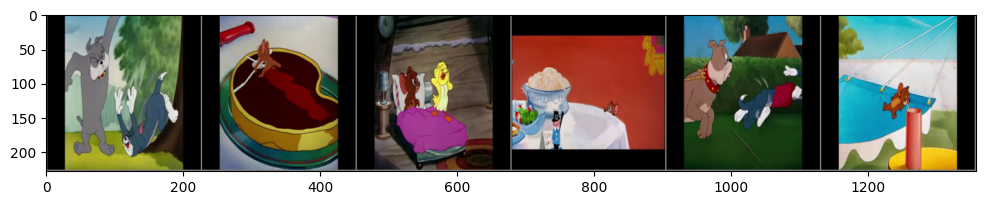

['tom', 'jerry', 'jerry', 'jerry', 'tom', 'jerry']


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
imgTensor = torchvision.utils.make_grid(batchX)
imgArray = imgTensor.numpy()
imgArray1 = np.zeros((imgArray.shape[1], imgArray.shape[2], 3))
imgArray1[:,:,0] = imgArray[0, :, :]
imgArray1[:,:,1] = imgArray[1, :, :]
imgArray1[:,:,2] = imgArray[2, :, :]
imgArray1 = imgArray1*0.5+0.5
plt.figure(figsize=(12, 6))
plt.imshow(imgArray1)
plt.show()
print([classes[i] for i in batchY_hat])

In [ ]:
tensorY=model(batchX.to(device))
print(tensorY.shape,"\n", tensorY)

torch.Size([6, 2]) 
 tensor([[ 0.0713,  0.2499],
        [-0.1532,  0.0484],
        [-0.1310,  0.0612],
        [ 0.0077,  0.0524],
        [-0.0301, -0.0301],
        [ 0.2629, -0.2375]], grad_fn=<AddmmBackward0>)


In [ ]:
loss = loss_func(tensorY, batchY_hat.to(device))
print(tensorY.shape, batchY_hat.shape, loss)

torch.Size([6, 2]) torch.Size([6]) tensor(0.6806, grad_fn=<NllLossBackward0>)


# **Training loop**

In [ ]:
lossLst = []
accuracyLst = []
for epoch in range(1, 5):
  print("\nepoch = ", epoch, end = ", ")
  print("batch: ", end="")
  for step, (batch_x, batchY_hat) in enumerate(loader):
    if(step%5==0):
      print(step, end = ", ")
    tensorY = model(batch_x.to(device))
    loss = loss_func(tensorY, batchY_hat.to(device))
    lossLst.append(float(loss))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    correct = 0
    tensorY = torch.softmax(tensorY, 1)
    MaxIdxOfEachRow = torch.max(tensorY, 1)[1]
    for i in range(batchY_hat.shape[0]):
      if (int(MaxIdxOfEachRow[i]) == int(batchY_hat[i])):
        correct += 1
    accuracy = correct/batchY_hat.shape[0]
    accuracyLst.append(accuracy)


epoch =  1, batch: 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 

KeyboardInterrupt: ignored

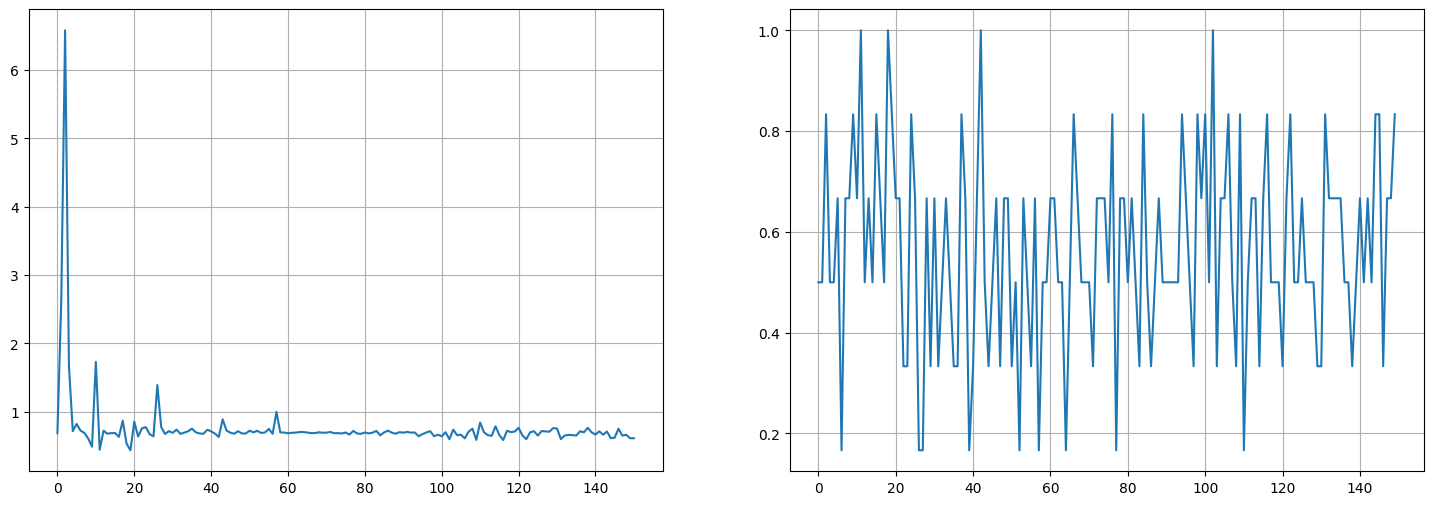

In [ ]:
fig=plt.figure(figsize=(18, 6))
fig.add_subplot(1, 2, 1)
plt.plot(lossLst)
plt.grid()

fig.add_subplot(1, 2, 2)
plt.plot(accuracyLst)
plt.grid()
plt.show()

# **Test**

In [ ]:
model.eval()

NameError: ignored

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving qms-bmh3.bmp to qms-bmh3.bmp


In [ ]:
fnameLst = list(uploaded.keys())
fname = fnameLst[0]
print(fname)

qms-bmh3.bmp


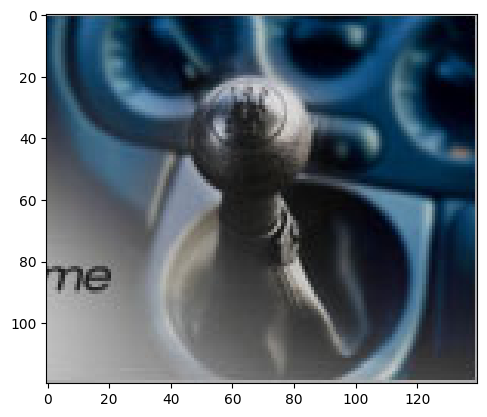

In [ ]:
import cv2
import matplotlib.pyplot as plt
image = cv2.imread(fname)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [ ]:
from PIL import Image
PILImg= Image.fromarray(image.astype('uint8')).convert('RGB')
PILImg = transformer(PILImg)
imageTensor = torch.unsqueeze(PILImg, 0)
imageTensor.shape

torch.Size([1, 3, 224, 224])

In [ ]:
tensorY = model(imageTensor.to(device))
tensorY_t = torch.softmax(tensorY, 1)
print(tensorY_t)
print(classes)

tensor([[0.5597, 0.4403]], grad_fn=<SoftmaxBackward0>)
['capoo', 'kanahis']


In [ ]:
!pip install pytorch-gradcam

from gradcam.utils import visualize_cam
from gradcam import GradCAM, GradCAMpp

gradcam = GradCAM.from_config(model_type='vgg', arch=model, layer_name='features_30')
#send input image to CNN to get model output
logit = model(imageTensor)
print(logit.shape)

#find the class index predicted by the CNN model
class_idx = int(logit.max(1)[-1])
print(class_idx)

# get a GradCAM saliency map on the class index
mask = gradcam(imageTensor, class_idx=class_idx)

# make heatmap from mask and synthesize saliency map using heatmap and img
heatmap, cam_result = visualize_cam(mask, imageTensor)

     |████████████████████████████████| 6.0 MB 3.8 MB/s 
  Created wheel for pytorch-gradcam: filename=pytorch_gradcam-0.2.1-py3-none-any.whl size=5269 sha256=e47973398909f87b769e79efee64242196b866e52a59aceffc89dbc154f831ce
  Stored in directory: /root/.cache/pip/wheels/06/e7/da/b13a71980c3a787414e5ff8e156701c561c6322636396d71cc
Successfully built pytorch-gradcam
torch.Size([1, 2])
0


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3704: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


AttributeError: ignored